### Depedencies

In [119]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Exploration

In [19]:
df = pd.read_csv('liar_dataset/train.tsv', sep="\t", header=None)

In [6]:
df.shape

(10239, 14)

In [7]:
df.head()

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0,3,2,5,1,a an online opinion-piece


### Extracting the training data

In [39]:
X_train = df[2]
y_train = df[1]

In [85]:
df = pd.read_csv('liar_dataset/test.tsv', sep="\t", header=None)
X_test = df[2]
y_test = df[1]

### Building Vectorizer Classifiers

In [74]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [75]:
tfidf_vectorizer.get_feature_names()[-10:]

['yes',
 'york',
 'young',
 'youre',
 'youth',
 'youtube',
 'youve',
 'zero',
 'zika',
 'zone']

In [76]:
tfidf_df.head()

,000,05,06,07,08,09,10,100,10315,106,...,yes,york,young,youre,youth,youtube,youve,zero,zika,zone
0,0,0,0,0,0,0,0,0,0,0,...,0.00000,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.00000,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.00000,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.00000,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.27535,0,0,0,0,0,0,0,0,0


In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
clf = MultinomialNB()

### Scenario 1

Converting all except 'true' to false

In [105]:
y_train_sc_1 = y_train.copy()

for i in range(len(y_train_sc_1)):
    if y_train[i] != 'true':
        y_train_sc_1[i] = 'false'

print("Comparison:\n")
print("New\tOld")
print("===\t===")
for i in range(10):
    print(y_train_sc_1[i], "\t", y_train[i])

Comparison:

New	Old
===	===
true 	 true
false 	 false
false 	 false
false 	 half-true
false 	 pants-fire
true 	 true
true 	 true
false 	 barely-true
true 	 true
false 	 barely-true


In [106]:
y_test_sc_1 = y_test.copy()

for i in range(len(y_test_sc_1)):
    if y_test[i] != 'true':
        y_test_sc_1[i] = 'false'
        
print("Comparison:\n")
print("New\tOld")
print("===\t===")  
for i in range(10):
    print(y_test_sc_1[i], "\t", y_test[i])

Comparison:

New	Old
===	===
true 	 true
false 	 false
false 	 false
false 	 half-true
false 	 pants-fire
true 	 true
true 	 true
false 	 barely-true
true 	 true
false 	 barely-true


In [129]:
def plotConfMat(linear_clf, y_train, y_test):
    linear_clf.fit(tfidf_train, y_train)
    pred = linear_clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    cm = metrics.confusion_matrix(y_test, pred, labels=['false', 'true'])
    plot_confusion_matrix(cm, classes=['false', 'true'])

#### Using different classifiers

accuracy:   0.871
Confusion matrix, without normalization


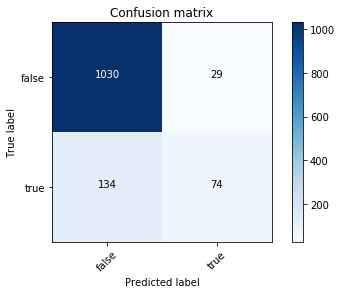

In [131]:
linear_clf = KNeighborsClassifier(3)
plotConfMat(linear_clf, y_train_sc_1, y_test_sc_1)

accuracy:   0.961
Confusion matrix, without normalization


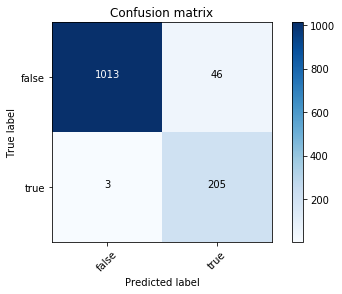

In [132]:
linear_clf = LogisticRegression(class_weight='balanced')
plotConfMat(linear_clf, y_train_sc_1, y_test_sc_1)

/home/saptarshi/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   1.000
Confusion matrix, without normalization


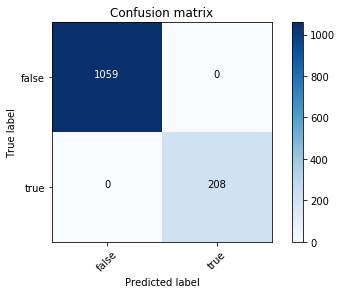

In [133]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
plotConfMat(linear_clf, y_train_sc_1, y_test_sc_1)

accuracy:   1.000
Confusion matrix, without normalization


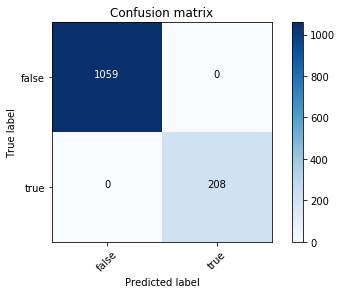

In [134]:
linear_clf = DecisionTreeClassifier(criterion='entropy')
plotConfMat(linear_clf, y_train_sc_1, y_test_sc_1)

### Scenario 2

Converting 'true', 'mostly-true' and 'half-true' to 'true' and the rest to 'false'

In [108]:
y_train_sc_2 = y_train.copy()

for i in range(len(y_train_sc_2)):
    if y_train[i] == 'true' or y_train[i] == 'mostly-true'  or y_train[i] == 'half-true' :
        y_train_sc_2[i] = 'true'
    else:
        y_train_sc_2[i] = 'false'
        
print("Comparison:\n")
print("New\tOld")
print("===\t===")  
for i in range(10):
    print(y_train_sc_2[i], "\t", y_train[i])

Comparison:

New	Old
===	===
true 	 true
false 	 false
false 	 false
true 	 half-true
false 	 pants-fire
true 	 true
true 	 true
false 	 barely-true
true 	 true
false 	 barely-true


In [109]:
y_test_sc_2 = y_test.copy()

for i in range(len(y_test_sc_2)):
    if y_test[i] == 'true' or y_test[i] == 'mostly-true'  or y_test[i] == 'half-true' :
        y_test_sc_2[i] = 'true'
    else:
        y_test_sc_2[i] = 'false'
        
print("Comparison:\n")
print("New\tOld")
print("===\t===")  
for i in range(10):
    print(y_test_sc_2[i], "\t", y_test[i])

Comparison:

New	Old
===	===
true 	 true
false 	 false
false 	 false
true 	 half-true
false 	 pants-fire
true 	 true
true 	 true
false 	 barely-true
true 	 true
false 	 barely-true


#### Using different classifiers

accuracy:   0.774
Confusion matrix, without normalization


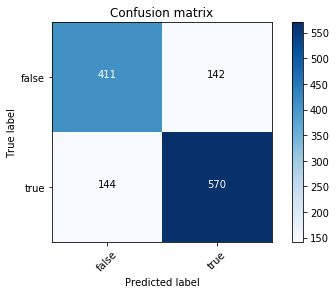

In [137]:
linear_clf = KNeighborsClassifier(3)
plotConfMat(linear_clf, y_train_sc_2, y_test_sc_2)

accuracy:   0.933
Confusion matrix, without normalization


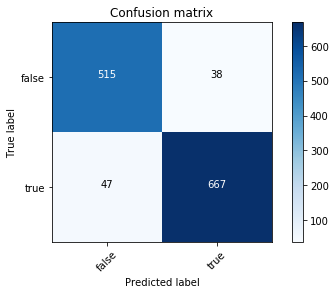

In [138]:
linear_clf = LogisticRegression(class_weight='balanced')
plotConfMat(linear_clf, y_train_sc_2, y_test_sc_2)

/home/saptarshi/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   1.000
Confusion matrix, without normalization


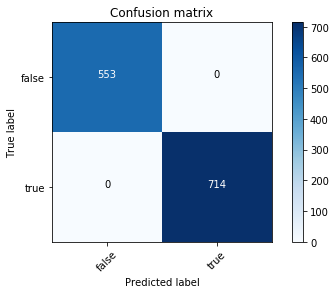

In [139]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
plotConfMat(linear_clf, y_train_sc_2, y_test_sc_2)

accuracy:   1.000
Confusion matrix, without normalization


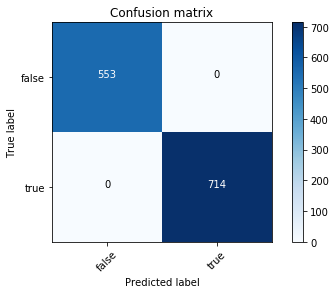

In [140]:
linear_clf = DecisionTreeClassifier(criterion='entropy')
plotConfMat(linear_clf, y_train_sc_2, y_test_sc_2)